Độ chính xác: 100.00%
Ma trận nhầm lẫn:
 [[60]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



c:\Users\dinhh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


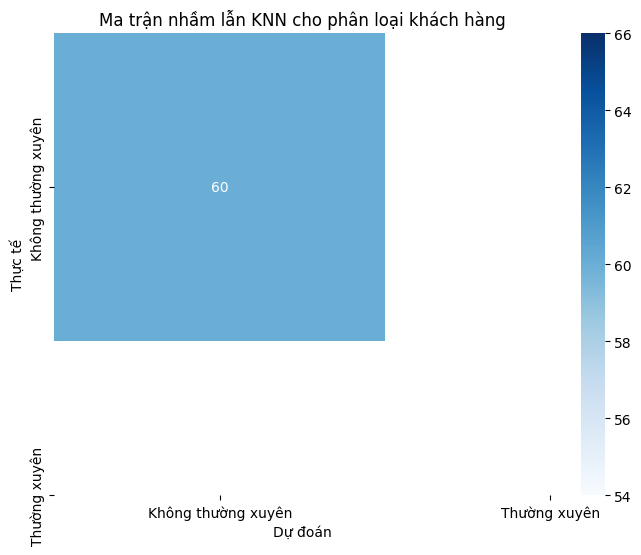

In [1]:
import numpy as np  # Thư viện hỗ trợ tính toán trên mảng nhiều chiều
from sklearn.model_selection import train_test_split # Hàm chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.neighbors import KNeighborsClassifier # Mô hình KNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Hàm đánh giá mô hình
import matplotlib.pyplot as plt # Thư viện vẽ đồ thị
import seaborn as sns # Thư viện vẽ đồ thị dựa trên Matplotlib

# Tạo dữ liệu giả định
np.random.seed(42) # Để kết quả tạo dữ liệu giống nhau mỗi lần chạy
n_samples = 200 # Số lượng mẫu dữ liệu
frequency = np.random.randint(1, 10, n_samples)  # Tần suất mua hàng
avg_order_value = np.random.randint(10, 100, n_samples)  # Giá trị đơn hàng trung bình
num_products = np.random.randint(1, 5, n_samples)  # Số lượng sản phẩm trong giỏ

# Phân loại khách hàng thành nhóm "Thường xuyên" (1) hoặc "Không thường xuyên" (0)
labels = (frequency + avg_order_value / 10 + num_products) > 20  # Quy tắc gán nhãn giả định
labels = labels.astype(int)

# Chuẩn bị tập dữ liệu và chia thành tập huấn luyện và tập kiểm tra
X = np.column_stack((frequency, avg_order_value, num_products)) # Tạo ma trận dữ liệu X từ 3 cột dữ liệu
y = labels # Nhãn y là nhóm khách hàng "Thường xuyên" hoặc "Không thường xuyên"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra

# Khởi tạo mô hình KNN với K = 5
knn_model = KNeighborsClassifier(n_neighbors=5) # Sử dụng 5 láng giềng gần nhất    
knn_model.fit(X_train, y_train) # Huấn luyện mô hình với dữ liệu huấn luyện

# Dự đoán trên tập kiểm tra
y_pred = knn_model.predict(X_test) # Dự đoán nhãn của tập kiểm tra

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred) # Độ chính xác của mô hình
conf_matrix = confusion_matrix(y_test, y_pred) # Ma trận nhầm lẫn
class_report = classification_report(y_test, y_pred) # Báo cáo phân loại

# In ra độ chính xác, ma trận nhầm lẫn và báo cáo phân loại
print(f"Độ chính xác: {accuracy * 100:.2f}%") 
print("Ma trận nhầm lẫn:\n", conf_matrix)
print("Báo cáo phân loại:\n", class_report)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Không thường xuyên", "Thường xuyên"], yticklabels=["Không thường xuyên", "Thường xuyên"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Ma trận nhầm lẫn KNN cho phân loại khách hàng")
plt.show()